Train Dataset:
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

Test Dataset:
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864
Mean Squared Error on Test Dataset: 9.432922192039305


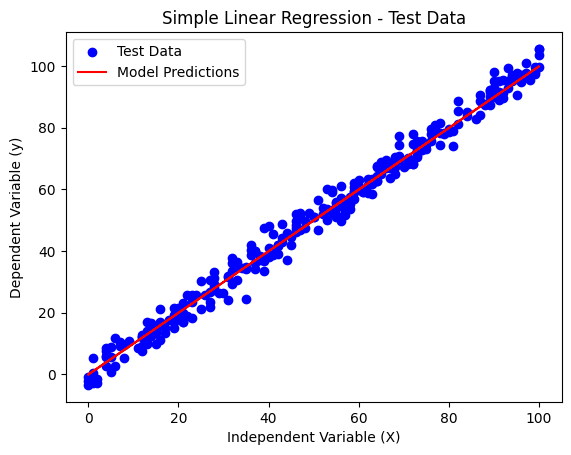

Predictions on new data: [76.94327594 20.90651855 21.90717494 19.90586217 35.91636428 14.90258026
 61.93343021 94.95509081 19.90586217  4.89601644  3.89536006 18.90520579
 95.95574719 61.93343021 35.91636428 14.90258026 64.93539936 13.90192388
 86.94983976 68.93802488 88.95115252 50.92621001 88.95115252 26.91045685
 96.95640358 57.93080468 78.9445887  20.90651855 92.95377805 26.91045685
 98.95771634 30.91308237 32.91439514 79.94524508 27.91111323 46.92358448
 52.92752277 68.93802488 27.91111323 32.91439514 90.95246528 70.93933765
 49.92555363 75.94261956  3.89536006 36.91702066 69.93868127 67.9373685
 39.91898981 34.9157079  93.95443443 87.95049614 51.92686639 30.91308237
 58.93146107 -0.10726546 38.91833343 63.93474297 68.93802488 56.9301483
 12.9012675  71.93999403 75.94261956 60.93277383 81.94655785 17.90454941
 40.91964619 49.92555363 54.92883554 12.9012675  45.9229281  12.9012675
 78.9445887  52.92752277 14.90258026 27.91111323 80.94590147 68.93802488
 51.92686639 83.94787061 67.9

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_path1 = '/content/sample_data/train data.csv'
file_path2 = '/content/sample_data/test data.csv'

# Load train dataset
train_df = pd.read_csv(file_path1)

# Displays the train dataset
print("Train Dataset:")
print(train_df.head())

# Load test dataset
test_df = pd.read_csv(file_path2)

# Displays the test dataset
print("\nTest Dataset:")
print(test_df.head())

train_df = train_df.dropna(subset=['y'])

# Feature Selection in Train Dataset
X_train = train_df[['x']]
y_train = train_df['y']

# Feature Selection in Test Dataset
X_test = test_df[['x']]
y_test = test_df['y']

# Model Initialization
model = LinearRegression()

# Model Training
model.fit(X_train, y_train)

# Model Evaluation on Test Dataset
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Dataset: {mse}')

# Visualization of linear regression model
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, predictions, color='red', label='Model Predictions')
plt.title('Simple Linear Regression - Test Data')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.show()

# Feature Selection in Test Dataset
X_test_new = test_df[['x']]

# Predictions on New Data
new_predictions = model.predict(X_test_new)
print(f'Predictions on new data: {new_predictions}')

# Model Coefficients
print(f'\nIntercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

# Create a DataFrame with 'x' and 'y' columns for comparison
comparison_df = pd.DataFrame({'x': X_test_new['x'].values, 'Actual y': y_test.values, 'Predicted y': new_predictions})

# Displays the comparison DataFrame
print(comparison_df)


Decision Tree


Decision Tree Mean Squared Error: 10.80868185383003


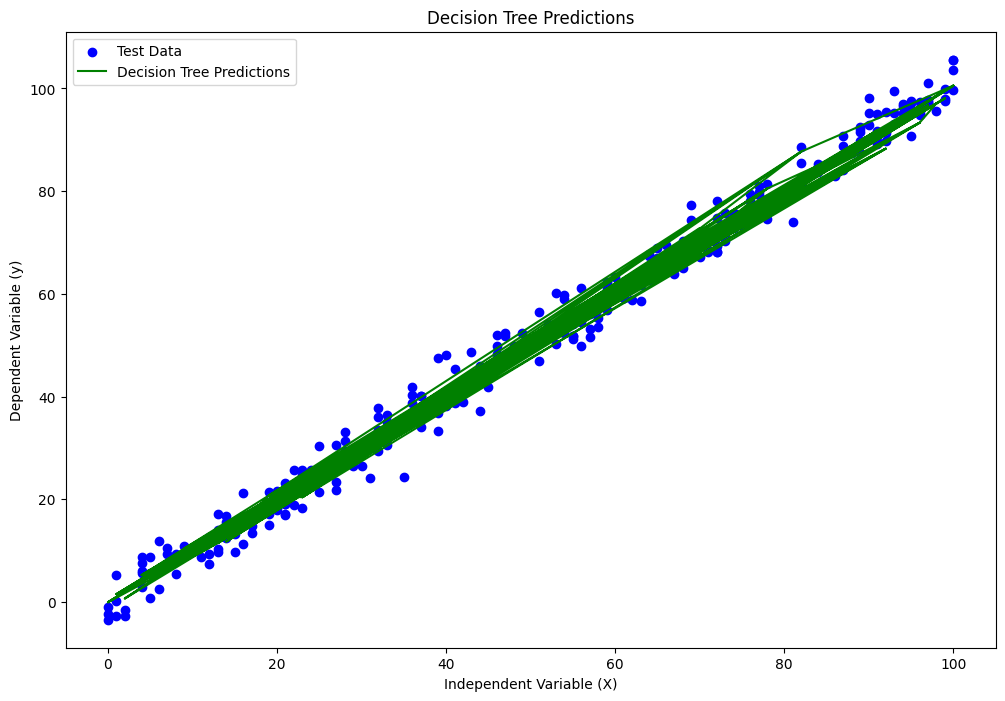

In [14]:
# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f'Decision Tree Mean Squared Error: {tree_mse}')

# Visualization for Decision Tree
plt.figure(figsize=(12, 8))

plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, tree_predictions, color='green', label='Decision Tree Predictions')

plt.title('Decision Tree Predictions')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.show()


Random Forest

Random Forest Mean Squared Error: 6.030755434310063


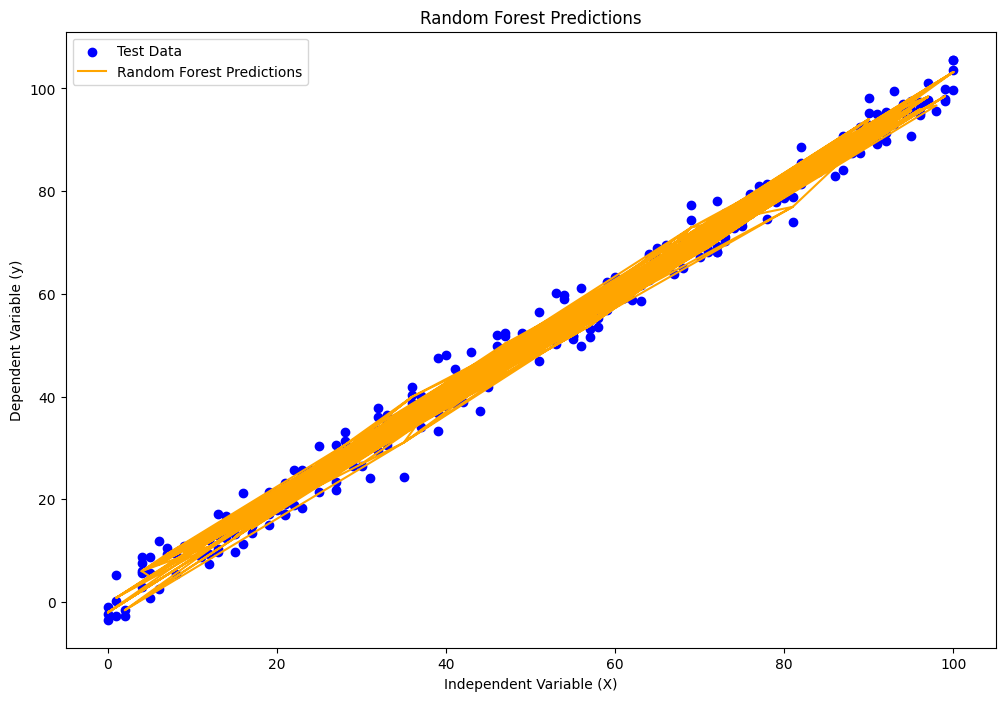

In [8]:

# Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
print(f'Random Forest Mean Squared Error: {forest_mse}')


# Visualization for Random Forest
plt.figure(figsize=(12, 8))

plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, forest_predictions, color='orange', label='Random Forest Predictions')

plt.title('Random Forest Predictions')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.show()


SVM

SVM Mean Squared Error: 9.210546145668502


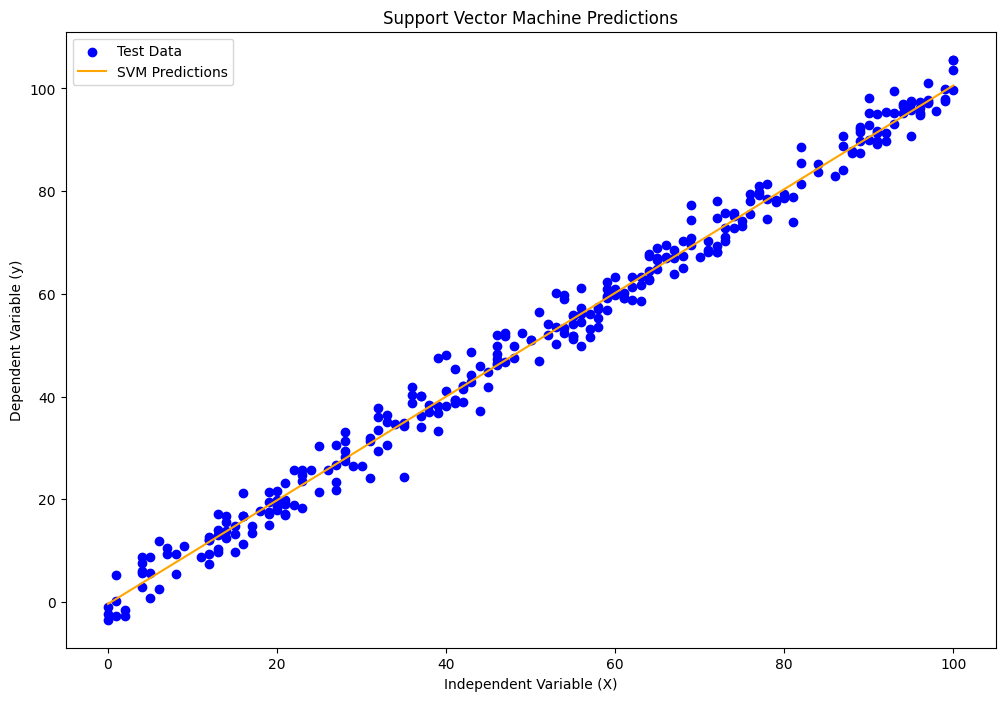

In [7]:
# Support Vector Machine (SVM)
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f'SVM Mean Squared Error: {svm_mse}')

#Visualization for Support Vector Machine (SVM)
plt.figure(figsize=(12, 8))

# Scatter plot of test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Line plot for SVM predictions
sorted_indices = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_indices], svm_predictions[sorted_indices], color='orange', label='SVM Predictions')

plt.title('Support Vector Machine Predictions')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.show()

KNN Model

KNN Mean Squared Error: 6.904305808440778


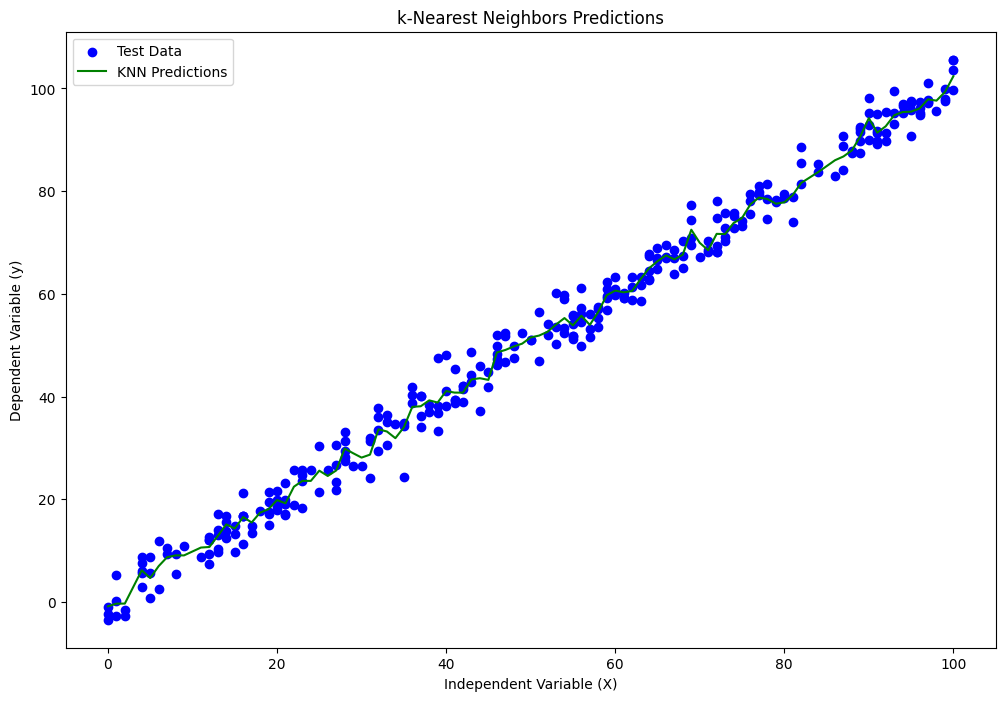

In [6]:

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'KNN Mean Squared Error: {knn_mse}')


#visualizations for KNN
plt.figure(figsize=(12, 8))

# Scatter plot of test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Line plot for KNN predictions
sorted_indices = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_indices], knn_predictions[sorted_indices], color='green', label='KNN Predictions')

plt.title('k-Nearest Neighbors Predictions')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.show()
